In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2
import warnings
warnings.filterwarnings("ignore")

In [2]:
def metodo_sotgia(x,y):
    media = list(np.mean([x,y], axis =0))
    
    complete_x = np.array(media + media)
    complete_y = np.array(list(x) + list(y))
    
    rho = np.corrcoef(complete_x, complete_y)[0][1]
    
    return rho, complete_x, complete_y

# I due strumenti misurano la stessa cosa

In [3]:
n_dati = 30
valori_veri = np.arange(20,20+n_dati)

dev1 = 1.5
metodo1 = valori_veri + np.random.normal(0,dev1,len(valori_veri))

dev2 = 3
metodo2 = valori_veri + np.random.normal(0,dev2,len(valori_veri))

df = pd.DataFrame()

df["Valori Veri"] = valori_veri
df["Misura 1"] = metodo1
df["Errore 1"] = dev1
df["Misura 2"] = metodo2
df["Errore 2"] = dev2

df["Differenza"] = metodo1 - metodo2
df["Errore Differenza"] = (dev1**2 + dev2**2)**0.5
df["Media"] = (df["Misura 1"] + df["Misura 2"])/2

# df

In [4]:
df.head()

,Valori Veri,Misura 1,Errore 1,Misura 2,Errore 2,Differenza,Errore Differenza,Media
0,20,17.671532,1.5,18.275963,3,-0.604432,3.354102,17.973747
1,21,21.962910,1.5,24.792941,3,-2.830031,3.354102,23.377926
2,22,23.442275,1.5,22.626853,3,0.815422,3.354102,23.034564
3,23,22.629548,1.5,20.479839,3,2.149709,3.354102,21.554694
4,24,23.508301,1.5,23.218632,3,0.289669,3.354102,23.363467


## Metodo Sotgia

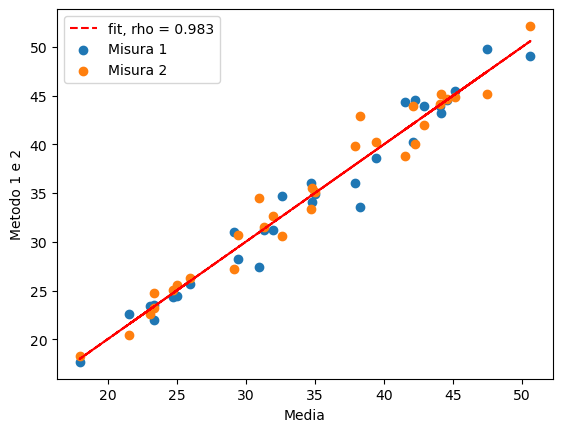

In [5]:
corr, complete_x, complete_y = metodo_sotgia(df["Misura 1"], df["Misura 2"])
a,b = np.polyfit(complete_x, complete_y,1)
corr = np.corrcoef(complete_x, complete_y)[0][1]

plt.plot(complete_x, a*complete_x + b, linestyle='--', label = f"fit, rho = {round(corr,3)}", color = "red")
plt.scatter(df["Media"], df["Misura 1"], label = "Misura 1")
plt.scatter(df["Media"], df["Misura 2"], label = "Misura 2")
plt.xlabel("Media")
plt.ylabel("Metodo 1 e 2")
plt.legend()

## Residui e chi^2

([<matplotlib.axis.XTick at 0x1c5e9a75790>,
 [Text(0, 0, 'Misura 0'),
  Text(9, 0, 'Misura 9'),
  Text(18, 0, 'Misura 18'),
  Text(27, 0, 'Misura 27')])

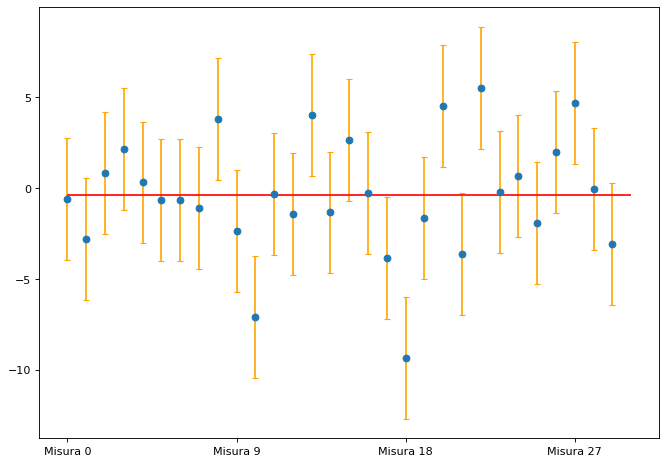

In [6]:
plt.figure(figsize=(10, 7), dpi=80)
plt.errorbar(np.arange(len(df)), df["Differenza"] , yerr=df["Errore Differenza"], capsize=3, fmt = "o", ecolor = "orange")
plt.hlines(np.mean(df["Differenza"]),0,n_dati, color = "red")
plt.xticks([0,9,18,27], [f"Misura {i}" for i in [0,9,18,27]])

In [7]:
chi = np.sum(df["Differenza"]**2/df["Errore Differenza"]**2)
p_value = chi2.cdf(chi, n_dati-1)
to_print = round(p_value*100, 2)
print(f"I due risultati sono diversi con una probabilità del {to_print}%")

I due risultati sono diversi con una probabilità del 51.49%


In [8]:
I2 = (chi - len(df))/chi
I2_to_print = max(0,round(I2,0))
print(f"I due campioni hanno una eterogeneità I^2 = {I2_to_print}%")

I due campioni hanno una eterogeneità I^2 = 0%


# I due strumenti misuarno cose diverse

In [9]:
n_dati = 30
valori_veri1 = np.arange(20,20+n_dati)
valori_veri2 = np.arange(5,5+n_dati)*2.1

dev1 = 1
metodo1 = valori_veri + np.random.normal(0,dev1,len(valori_veri))

dev2 = 3
metodo2 = valori_veri2 + np.random.normal(0,dev2,len(valori_veri))

df = pd.DataFrame()

df["Valori Veri"] = valori_veri
df["Misura 1"] = metodo1
df["Errore 1"] = dev1
df["Misura 2"] = metodo2
df["Errore 2"] = dev2

df["Differenza"] = metodo1 - metodo2
df["Errore Differenza"] = (dev1**2 + dev2**2)**0.5
df["Media"] = (df["Misura 1"] + df["Misura 2"])/2

# df

## Metodo Sotgia

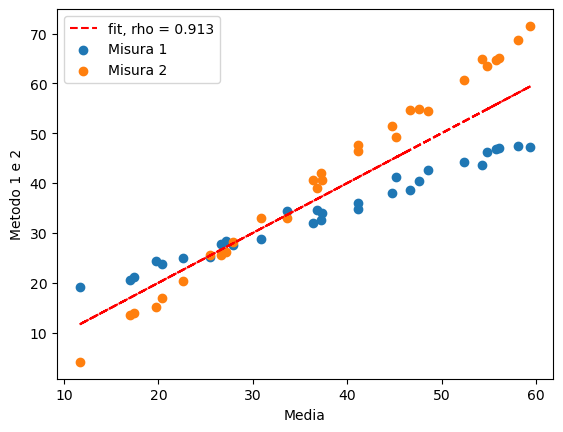

In [10]:
complete_x = np.array(list(df["Media"]) + list(df["Media"]))
complete_y = np.array(list(df["Misura 1"]) + list(df["Misura 2"]))

a,b = np.polyfit(complete_x, complete_y,1)
corr = np.corrcoef(complete_x, complete_y)[0][1]

plt.plot(complete_x, a*complete_x + b, linestyle='--', label = f"fit, rho = {round(corr,3)}", color = "red")
plt.scatter(df["Media"], df["Misura 1"], label = "Misura 1")
plt.scatter(df["Media"], df["Misura 2"], label = "Misura 2")
plt.xlabel("Media")
plt.ylabel("Metodo 1 e 2")
plt.legend()

## Residui chi2 e I2

([<matplotlib.axis.XTick at 0x1c5e9969040>,
 [Text(0, 0, 'Misura 0'),
  Text(9, 0, 'Misura 9'),
  Text(18, 0, 'Misura 18'),
  Text(27, 0, 'Misura 27')])

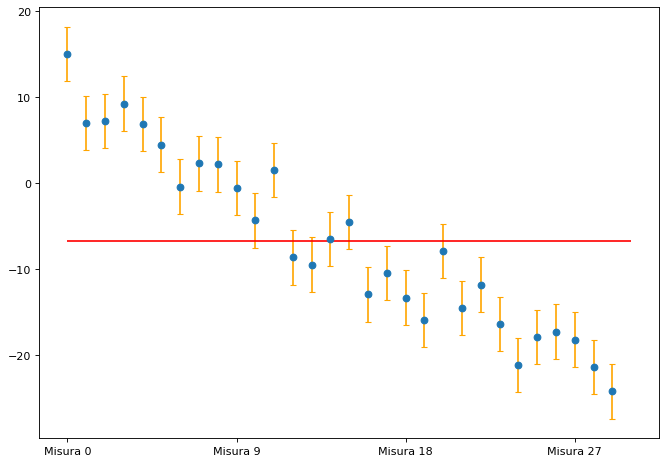

In [11]:
plt.figure(figsize=(10, 7), dpi=80)
plt.errorbar(np.arange(len(df)), df["Differenza"] , yerr=df["Errore Differenza"], capsize=3, fmt = "o", ecolor = "orange")
plt.hlines(np.mean(df["Differenza"]),0,n_dati, color = "red")
plt.xticks([0,9,18,27], [f"Misura {i}" for i in [0,9,18,27]])

In [12]:
chi = np.sum(df["Differenza"]**2/df["Errore Differenza"]**2)
p_value = chi2.cdf(chi, n_dati-1)
to_print = round(p_value*100, 2)
print(f"I due risultati sono diversi con una probabilità del {to_print}%")

I due risultati sono diversi con una probabilità del 100.0%


In [13]:
I2 = (chi - len(df))/chi*100
I2_to_print = max(0,round(I2,0))
print(f"I due campioni hanno una eterogeneità I^2 = {I2_to_print}%")

I due campioni hanno una eterogeneità I^2 = 93.0%


# Veri dati

In [5]:
def num_after_point(x):
    s = str(x)
    if not '.' in s:
        return 0
    return len(s) - s.index('.') - 1

def read_data(path, foglio):
    dati = pd.read_excel(path, f"Foglio{foglio}")    
    return dati

In [6]:
class StatDf(pd.DataFrame):
    def __init__(self, dati, err1=0, err2=0):
        '''Takes a two columns dataframe and performs Sotgia and I2 method to compare the measures'''
        pd.DataFrame.__init__(self, dati)
        self.dati = dati
        self.dati = self.dati.sort_values(self.dati.columns[0])
        self.dati.index = range(len(self.dati))
        
        self.original_columns = self.dati.columns
        self.dati.columns = ["Misura 1", "Misura 2"]
        
        if err1 == 0:
            self.dati["Errore 1"] = 10**-(np.max(self.dati["Misura 1"].apply(num_after_point)))
        else: self.dati["Errore 1"] = err1
        if err2 == 0:
            self.dati["Errore 2"] = 10**-(np.max(self.dati["Misura 2"].apply(num_after_point)))
        else: self.dati["Errore 2"] = err2
        self.dati["Diff"] = self.dati["Misura 1"]- self.dati["Misura 2"]
        self.dati["Errore Differenza"] = (self.dati["Errore 2"]**2 + self.dati["Errore 1"]**2)**0.5
        self.dati["Media"] = (self.dati["Misura 1"] + self.dati["Misura 2"])/2
        
    def get_stats(self, verbose = True):
    
        chi = np.sum(self.dati["Diff"]**2/self.dati["Errore Differenza"]**2)
        p_value = chi2.cdf(chi, len(self.dati))
        to_print = round(p_value*100, 3)

        I2 = (chi - len(self.dati))/chi*100
        I2_to_print = max(0,round(I2,3))

        if verbose:
            print(f"I due risultati sono diversi con una probabilità del {to_print}%")
            print(f"I due campioni hanno una eterogeneità I^2 = {I2_to_print}%")

        return chi, p_value, I2
    
    def plot_data(self):
        
        x_to_fit = np.array(list(self.dati["Media"]) + list(self.dati["Media"]))
        y_to_fit = np.array(list(self.dati["Misura 1"]) + list(self.dati["Misura 2"]))

        a,b = np.polyfit(x_to_fit, y_to_fit,1)
        corr = np.corrcoef(x_to_fit, y_to_fit)[0][1]
        
        chi, p_value, I2 = self.get_stats(verbose = False)

        plt.plot(x_to_fit, a*x_to_fit + b, linestyle='--', label = f"R2 = {round(corr,3)}, I2 = {max(0,round(I2,0))}%", color = "red")
        plt.scatter(self.dati["Media"], self.dati["Misura 1"], label = "Misura 1")
        plt.scatter(self.dati["Media"], self.dati["Misura 2"], label = "Misura 2")
        plt.xlabel("Media")
        plt.ylabel("Metodo 1 e 2")
        plt.title(f"Dati {self.original_columns[0]} vs {self.original_columns[1]}")
        plt.legend()
        
    
        

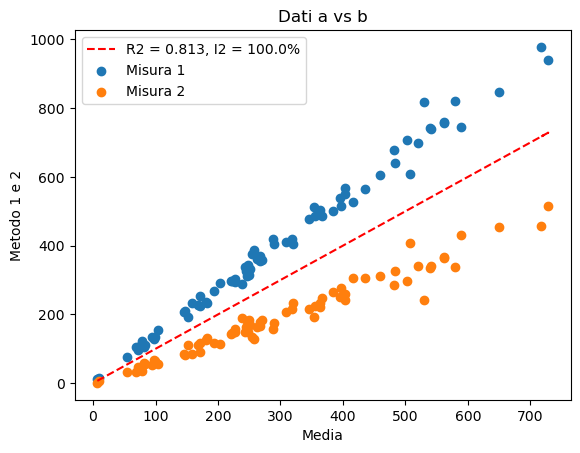

In [7]:
path = 'Dati.xlsx'
foglio = 1
dati_1 = read_data(path, foglio)

dati_1 = StatDf(dati_1)
dati_1.plot_data()

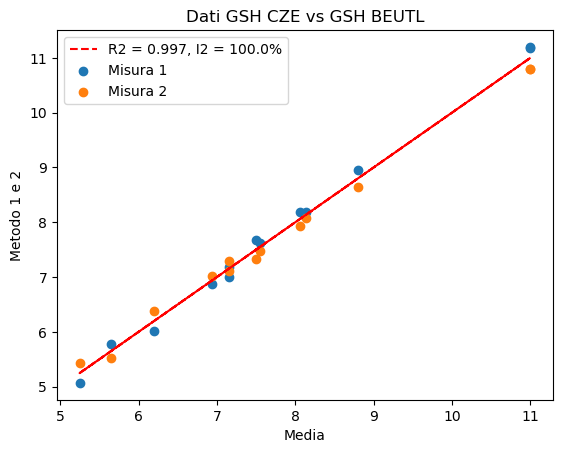

In [8]:
path = 'Dati.xlsx'
foglio = 2
dati_2 = read_data(path, foglio)

dati_2 = StatDf(dati_2)
dati_2.plot_data()

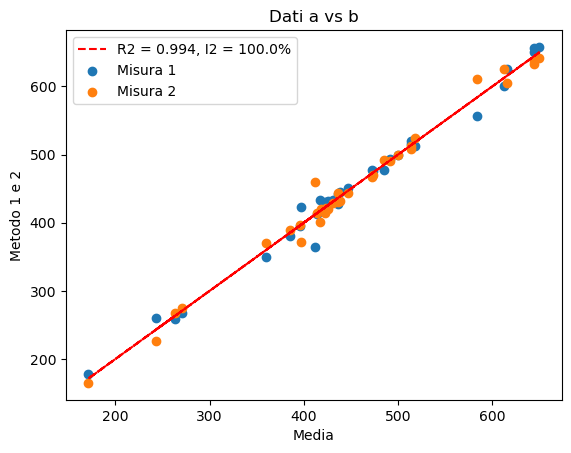

In [9]:
path = 'Dati.xlsx'
foglio = 3
dati_3 = read_data(path, foglio)

dati_3 = StatDf(dati_3)
dati_3.plot_data()

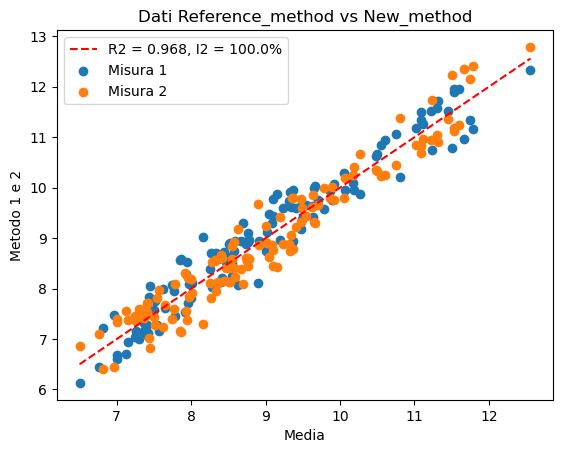

In [10]:
path = 'Dati.xlsx'
foglio = 4
dati_3 = read_data(path, foglio)

dati_3 = StatDf(dati_3)
dati_3.plot_data()

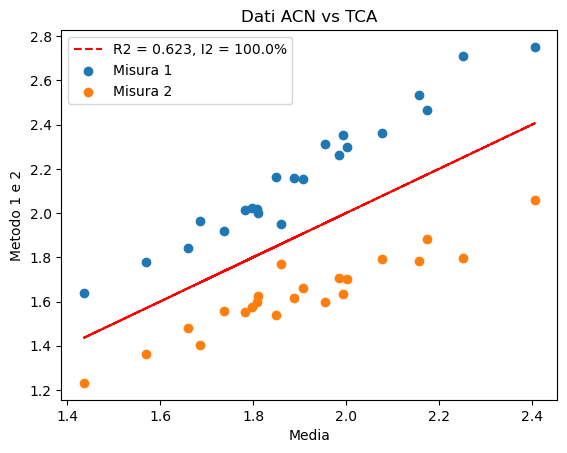

In [11]:
path = 'Dati.xlsx'
foglio = 5
dati_3 = read_data(path, foglio)

dati_3 = StatDf(dati_3)
dati_3.plot_data()

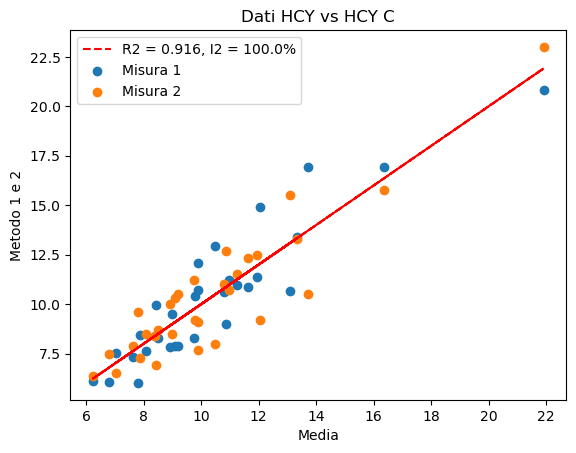

In [12]:
path = 'Dati.xlsx'
foglio = 6
dati_3 = read_data(path, foglio)

dati_3 = StatDf(dati_3)
dati_3.plot_data()